<a href="https://colab.research.google.com/github/cksdnr1/PyTorchPJ/blob/main/2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 변수의 shape, type, value 확인
def p(var,_str='') :
    if _str=='\n' or _str=='cr' :
        _str = '\n'
    else :
        print(f'<<{_str}>>:')
        _str = ''
    if type(var)!=type([]):
        try: 
            print(f'Shape:{var.shape}')
        except : 
            pass
    print(f'Type: {type(var)}')
    print(f'Values: {var}'+_str)

def pst(_x,_name=""):
    print(f'[{_name}] Shape{_x.shape}, {type(_x)}')
def ps(_x,_name=""):
    print(f'[{_name}] Shape{_x.shape}') 

In [ ]:
%%capture
!pip install pytorch_lightning torchinfo torchmetrics torchviz 

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
import torch.optim as optim

import pytorch_lightning as pl
from pytorch_lightning.accelerators import accelerator
from torchmetrics import functional as FM
from torchinfo import summary 


from torchvision.datasets import MNIST
import torchvision.transforms as transforms
import torch.utils.data as data 
from torch.utils.data import DataLoader

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

torch.__version__,pl.__version__

('1.12.1+cu113', '1.8.3.post1')

# Image Datasets 

In [ ]:
from torchvision.datasets import MNIST, FashionMNIST, CIFAR10, CIFAR100
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

mnist_transform = transforms.Compose([
    transforms.ToTensor(), 
])

epochs=3
batch_size=1024

download_root = './MNIST'
train_dataset = MNIST(download_root, transform=mnist_transform, train=True, download=True)
test_dataset = MNIST(download_root, transform=mnist_transform, train=False, download=True)
trainDataLoader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valDataLoader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

download_root = './F-MNIST'
fashion_train = FashionMNIST(download_root, transform=mnist_transform, train=True, download=True)
fashion_test = FashionMNIST(download_root, transform=mnist_transform, train=True, download=True)
fTrainDataLoader = DataLoader(fashion_train, batch_size=batch_size, shuffle=True)
fValDataLoader = DataLoader(fashion_test, batch_size=batch_size, shuffle=False)

download_root = './CIFAR10'
cifar10_train = CIFAR10(download_root, transform=mnist_transform, train=True, download=True)
cifar10_test = CIFAR10(download_root, transform=mnist_transform, train=True, download=True)
c10TrainDataLoader = DataLoader(cifar10_train, batch_size=batch_size, shuffle=True)
c10ValDataLoader = DataLoader(cifar10_test, batch_size=batch_size, shuffle=False)

download_root = './CIFAR100'
cifar100_train = CIFAR100(download_root, transform=mnist_transform, train=True, download=True)
cifar100_test = CIFAR100(download_root, transform=mnist_transform, train=True, download=True)
c100TrainDataLoader = DataLoader(cifar100_train, batch_size=batch_size, shuffle=True)
c100ValDataLoader = DataLoader(cifar100_test, batch_size=batch_size, shuffle=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/MNIST/raw



  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./F-MNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./F-MNIST/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./F-MNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./F-MNIST/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./F-MNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./F-MNIST/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./F-MNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./F-MNIST/FashionMNIST/raw



  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./CIFAR10/cifar-10-python.tar.gz to ./CIFAR10
Files already downloaded and verified


  0%|          | 0/169001437 [00:00<?, ?it/s]

Extracting ./CIFAR100/cifar-100-python.tar.gz to ./CIFAR100
Files already downloaded and verified


In [ ]:
## target lable의 image 확인하기 
def img_plot(data, lable, target):
    plt.figure(figsize=(12, 3))
    idx = 0
    data_ = data.permute(0, 2, 3, 1)
    for i in range(36):
        while lable[idx] != target :
            idx += 1
            if idx >=1024 : idx=0
        plt.subplot(3, 12, i+1)
        if data_.shape[-1] == 1:
            data_ = data_[..., 0]
        plt.imshow(data_[idx])
        plt.axis("off")
        idx += 1
    plt.show()

- 동일 class 이미지들의 다양성 확인하기

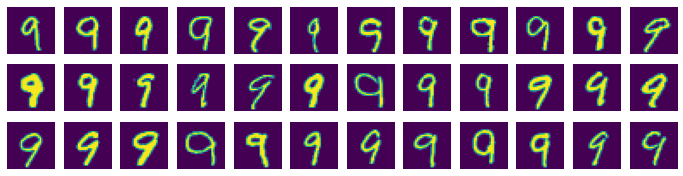

[] Shapetorch.Size([1024, 1, 28, 28]), <class 'torch.Tensor'>


In [ ]:
x_train, y_train = next(iter(trainDataLoader))
img_plot(x_train, y_train, 9 )
pst(x_train)

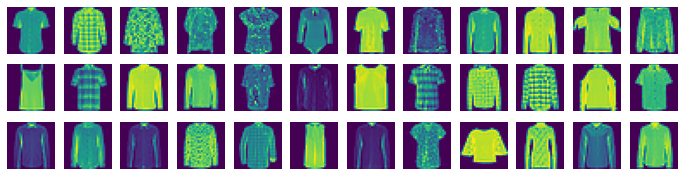

[] Shapetorch.Size([1024, 1, 28, 28]), <class 'torch.Tensor'>


In [ ]:
x_train, y_train = next(iter(fTrainDataLoader))
img_plot(x_train, y_train, 6)
pst(x_train)

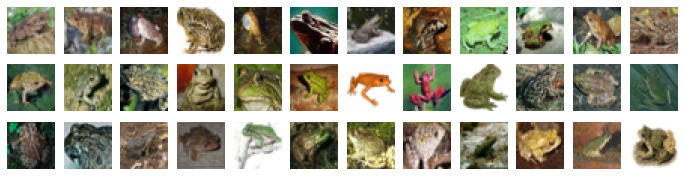

[] Shapetorch.Size([1024, 3, 32, 32]), <class 'torch.Tensor'>


In [ ]:
x_train, y_train = next(iter(c10TrainDataLoader))
img_plot(x_train, y_train, 6)
pst(x_train)

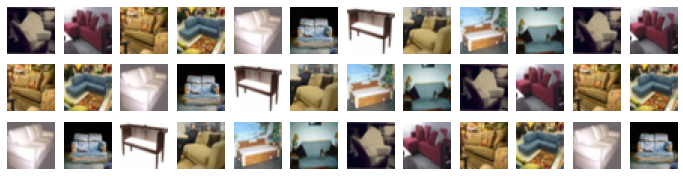

[] Shapetorch.Size([1024, 3, 32, 32]), <class 'torch.Tensor'>


In [ ]:
x_train, y_train = next(iter(c100TrainDataLoader))
img_plot(x_train, y_train, 25)
pst(x_train)

## Data Containers in Lightning  
https://pytorch-lightning.readthedocs.io/en/latest/guides/data.html

## 실습 1 

실습
Sample code에서 시작하여 모델을 개선하세요
최종모델 code와 학습과정을 제출하세요. 

**Step 1** :    
input dataset 을 CIFAR-10 으로 바꾸고  
기본 모델과, BatchNormalization Layer를 추가한  
모델의 성능변화를 확인 하세요.  
Input data의 shape에 주의   
Layer Input output 변수에 주의   
**Step 2** :   
모델 개선 : Layer추가 및 기타 개선    
Dropout등 도 추가, val_acc가 최고인 모델을 만들어 보세요.  
Epoch = 30, batch_size = 512 유지   
**Step 3** :   
Sequential model로 재설계해 보세요.    

In [ ]:
### input dataset을 CIFA-10으로 바꿔봅니다. 

In [ ]:
import matplotlib.pylab as plt

# 데이터 준비 
x_train, y_train = next(iter(c10TrainDataLoader))
x_test, y_test = next(iter(c10ValDataLoader))
pst(x_train)

[] Shapetorch.Size([1024, 3, 32, 32]), <class 'torch.Tensor'>


### Single Layer Perceptron Model : model_SLP

In [ ]:
loss_function = nn.CrossEntropyLoss()
class ModelSLP(pl.LightningModule):
    def __init__(self):
        super(ModelSLP, self).__init__()
        self.flatten = nn.Flatten()
        self.layers1 = nn.Linear(32*32*3, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = self.layers1(x)
        return x
    
    def training_step(self, batch, batch_idx):
        x, y = batch
        y_pred = self(x)
        loss = loss_function(y_pred, y)
        acc = FM.accuracy(y_pred, y)
        metrics={'loss':loss, 'acc':acc}
        self.log_dict(metrics)
        return loss
    
    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_pred = self(x) 
        loss = loss_function(y_pred, y)
        acc = FM.accuracy(y_pred, y)
        metrics = {'val_loss':loss, 'val_acc':acc}
        self.log_dict(metrics)
        return loss
    
    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.001)

model = ModelSLP()
summary(model, input_size=(8, 3, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
ModelSLP                                 [8, 10]                   --
├─Flatten: 1-1                           [8, 3072]                 --
├─Linear: 1-2                            [8, 10]                   30,730
Total params: 30,730
Trainable params: 30,730
Non-trainable params: 0
Total mult-adds (M): 0.25
Input size (MB): 0.10
Forward/backward pass size (MB): 0.00
Params size (MB): 0.12
Estimated Total Size (MB): 0.22

In [ ]:
%%time
model = ModelSLP()

name = 'ModelSLP'
logger = pl.loggers.CSVLogger("logs", name=name) 
trainer = pl.Trainer(max_epochs=15, logger=logger, accelerator='auto') 
trainer.fit(model, c10TrainDataLoader, c10ValDataLoader) 

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name    | Type    | Params
------------------------------------
0 | flatten | Flatten | 0     
1 | layers1 | Linear  | 30.7 K
------------------------------------
30.7 K    Trainable params
0         Non-trainable params
30.7 K    Total params
0.123     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:1896: PossibleUserWarning: The number of training batches (49) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  category=PossibleUserWarning,


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=15` reached.


CPU times: user 2min 43s, sys: 1e+03 ms, total: 2min 44s
Wall time: 2min 47s


In [ ]:
v_num = logger.version ## model.get_progress_bar_dict()['v_num'] 
history = pd.read_csv(f'./logs/{name}/version_{v_num}/metrics.csv') 
df = history.groupby('epoch').mean().drop('step', axis=1) 

MaxAcc:[ 0.4090799987316131 ]


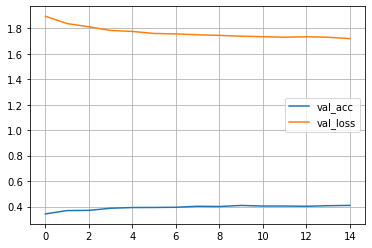

In [ ]:
import matplotlib.pylab as plt

print('MaxAcc:[',df['val_acc'].max(),']')

plt.plot(df['val_acc'], linestyle='-', label="val_acc")
plt.plot(df['val_loss'], linestyle='-', label="val_loss")
# plt.plot(df2['val_acc'], linestyle='--', label="_val_acc")
# plt.plot(df2['val_loss'], linestyle='--', label="_val_loss")

#plt.ylim(0.2,0.95)
plt.legend()
plt.grid()
plt.show() 

실습 코드와 결과를 아래에 저장 하세요.

## 실습결과 예시 

##### 결과 : Step 1

In [ ]:
loss_function = nn.CrossEntropyLoss()
class ModelTest(pl.LightningModule):
    def __init__(self):
        super(ModelTest, self).__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32*32*3, 10),
            nn.BatchNorm1d(10))

    def forward(self, x):
        out = self.layers(x)
        return out
    
    def training_step(self, batch, batch_idx):
        x, y = batch
        y_pred = self(x)
        loss = loss_function(y_pred, y)
        acc = FM.accuracy(y_pred, y, task="multiclass",num_classes=10)
        metrics={'loss':loss, 'acc':acc}
        self.log_dict(metrics)
        return loss
    
    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_pred = self(x) 
        loss = loss_function(y_pred, y)
        acc = FM.accuracy(y_pred, y, task="multiclass",num_classes=10)
        metrics = {'val_loss':loss, 'val_acc':acc}
        self.log_dict(metrics)
        return loss
    
    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.001)
model = ModelTest()
summary(model, input_size=(8, 3, 32, 32))

Layer (type:depth-idx)                   Output Shape              Param #
ModelTest                                [8, 10]                   --
├─Sequential: 1-1                        [8, 10]                   --
│    └─Flatten: 2-1                      [8, 3072]                 --
│    └─Linear: 2-2                       [8, 10]                   30,730
│    └─BatchNorm1d: 2-3                  [8, 10]                   20
Total params: 30,750
Trainable params: 30,750
Non-trainable params: 0
Total mult-adds (M): 0.25
Input size (MB): 0.10
Forward/backward pass size (MB): 0.00
Params size (MB): 0.12
Estimated Total Size (MB): 0.22

##### 결과 : Step 2

In [ ]:
loss_function = nn.CrossEntropyLoss()
class modelMLP(pl.LightningModule):
    def __init__(self):
        super(modelMLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32*32*3, 128),
            nn.BatchNorm1d(128),
            nn.LeakyReLU(0.3),
            nn.Dropout(0.4),
            nn.Linear(128, 10))

    def forward(self, x):
        out = self.layers(x)
        return out
    
    def training_step(self, batch, batch_idx):
        x, y = batch
        y_pred = self(x)
        loss = loss_function(y_pred, y)
        acc = FM.accuracy(y_pred, y, task="multiclass",num_classes=10)
        metrics={'loss':loss, 'acc':acc}
        self.log_dict(metrics)
        return loss
    
    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_pred = self(x) 
        loss = loss_function(y_pred, y)
        acc = FM.accuracy(y_pred, y, task="multiclass",num_classes=10)
        metrics = {'val_loss':loss, 'val_acc':acc}
        self.log_dict(metrics)
        return loss
    
    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.001)
        
model = modelMLP()
summary(model, input_size=(8, 3, 32, 32))

##### 결과 : Step 3

In [ ]:
loss_function = nn.CrossEntropyLoss()
class modelMLP2(pl.LightningModule):
    def __init__(self):
        super(modelMLP2, self).__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32*32*3, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Linear(32, 10),
            nn.BatchNorm1d(10))

    def forward(self, x):
        out = self.layers(x)
        return out
    
    def training_step(self, batch, batch_idx):
        x, y = batch
        y_pred = self(x)
        loss = loss_function(y_pred, y)
        acc = FM.accuracy(y_pred, y, task="multiclass",num_classes=10)
        metrics={'loss':loss, 'acc':acc}
        self.log_dict(metrics)
        return loss
    
    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_pred = self(x) 
        loss = loss_function(y_pred, y)
        acc = FM.accuracy(y_pred, y, task="multiclass",num_classes=10)
        metrics = {'val_loss':loss, 'val_acc':acc}
        self.log_dict(metrics, prog_bar=True)
        return loss
    
    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.001)

model = modelMLP2()
summary(model, input_size=(8, 3, 32, 32))